In [71]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [72]:
def start_work(state:State):
    print("Start_Work node has been called!!!")
    return {"graph_info":state['graph_info'] + " I am planning to work,"}

def research(state:State):
    print("My research node has been called!!!")
    return {"graph_info":state['graph_info'] + " I will do research"}

def develop(state:State):
    print("My develop node has been called!!!")
    return {"graph_info":state['graph_info'] + " I will do developing"}

In [73]:
import random
from typing import Literal

def random_work(state) -> Literal['research', 'develop']:
    if random.random()<0.5:
        return 'research'
    else:
        return 'develop'

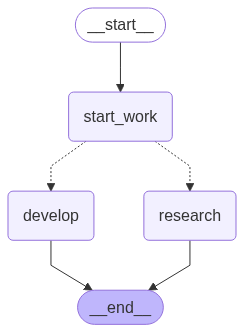

In [74]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

## Graph build
graph = StateGraph(State)

## Adding the nodes
graph.add_node("start_work", start_work)
graph.add_node("research", research)
graph.add_node("develop", develop)

## Schedule the flow of the graph
graph.add_edge(START, "start_work")
graph.add_conditional_edges("start_work", random_work)
graph.add_edge("research", END)
graph.add_edge("develop", END)

## compile the graph
graph_builder = graph.compile()

## view
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [75]:
graph_builder.invoke({"graph_info":"This is TJ. "})

Start_Work node has been called!!!
My research node has been called!!!


{'graph_info': 'This is TJ.  I am planning to work, I will do research'}

In [76]:
graph_builder.invoke({"graph_info":"This is TJ. "})

Start_Work node has been called!!!
My develop node has been called!!!


{'graph_info': 'This is TJ.  I am planning to work, I will do developing'}